## Описание проекта:

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Ваша задача — обучить на этих данных модель для прогноза оттока клиентов.

## Описание данных

### Датасеты
- **contract_new.csv** — информация о договоре.
- **personal_new.csv** — персональные данные клиента.
- **internet_new.csv** — информация об интернет-услугах.
- **phone_new.csv** — информация об услугах телефонии.

---

#### contract_new.csv
- **customerID** — идентификатор абонента.
- **BeginDate** — дата начала действия договора.
- **EndDate** — дата окончания действия договора.
- **Type** — тип оплаты: раз в год-два или ежемесячно.
- **PaperlessBilling** — электронный расчётный лист.
- **PaymentMethod** — тип платежа.
- **MonthlyCharges** — расходы за месяц.
- **TotalCharges** — общие расходы абонента.

---

#### personal_new.csv
- **customerID** — идентификатор пользователя.
- **gender** — пол.
- **SeniorCitizen** — является ли абонент пенсионером.
- **Partner** — есть ли у абонента супруг или супруга.
- **Dependents** — есть ли у абонента дети.

---

#### internet_new.csv
- **customerID** — идентификатор пользователя.
- **InternetService** — тип подключения.
- **OnlineSecurity** — блокировка опасных сайтов.
- **OnlineBackup** — облачное хранилище файлов для резервного копирования данных.
- **DeviceProtection** — антивирус.
- **TechSupport** — выделенная линия технической поддержки.
- **StreamingTV** — стриминговое телевидение.
- **StreamingMovies** — каталог фильмов.

---

#### phone_new.csv
- **customerID** — идентификатор пользователя.
- **MultipleLines** — подключение телефона к нескольким линиям одновременно.


## План работы

1. **Загрузка данных**
   - Загрузка всех файлов
   - Первичный осмотр данных

2. **Исследовательский анализ и предобработка данных**
   - Анализ каждого набора данных
   - Очистка и подготовка данных для объединения

3. **Объединение данных**
   - Слияние таблиц в единый датафрейм по ключу `customerID`

4. **Анализ объединённого датафрейма**
   - Анализ и визуализация распределений признаков
   - Проверка корреляций между признаками
   - Генерация новых признаков при необходимости

5. **Подготовка данных**
   - Разделение на обучающую и тестовую выборки
   - Масштабирование числовых признаков
   - Кодирование категориальных признаков

6. **Обучение моделей**
   - Тестирование нескольких моделей машинного обучения
   - Подбор гиперпараметров для лучшей модели

7. **Оценка и выбор модели**
   - Проверка качества моделей на тестовой выборке
   - Выбор лучшей модели

8. **Рекомендации и выводы**
   - Формулирование рекомендаций на основе результатов
   - Общий вывод по проекту

## Цель проекта
Разработать модель, прогнозирующую вероятность расторжения договора абонентами оператора связи «ТелеДом», чтобы вовремя предложить меры по их удержанию.

In [1]:
!pip install phik

In [2]:
# импорт библиотек
import phik
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from phik import phik_matrix


# Статистические функции
from scipy.stats import chi2_contingency, randint, uniform

# Модули для предобработки и построения моделей
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Метрики для оценки моделей
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, make_scorer, roc_curve, auc, confusion_matrix, accuracy_score

In [3]:
contract_data = pd.read_csv('/datasets/contract_new.csv')
personal_data = pd.read_csv('/datasets/personal_new.csv')
internet_data = pd.read_csv('/datasets/internet_new.csv')
phone_data = pd.read_csv('/datasets/phone_new.csv')

In [4]:
data_sets = {
    "Contract Data": contract_data,
    "Personal Data": personal_data,
    "Internet Data": internet_data,
    "Phone Data": phone_data
}
def data_set_info():
    for ds_name, ds in data_sets.items():
        print(f"----- {ds_name} -----")
        display(ds.head())  # Убедитесь, что display определён (например, из IPython.display)
        ds.info()
        print('\n')

# Вызов функции
data_set_info()

----- Contract Data -----


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


----- Personal Data -----


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


----- Internet Data -----


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


----- Phone Data -----


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB




## Предобработка данных каждого датасета
   1. Удаление дубликатов
   2. Обработка пропусков
   3. Преобразование типов данных
   4. Приведение заголовков к змеиному регистру

In [5]:
# приводим названия столбцов к змеиному регистру
contract_data.columns = contract_data.columns.str.lower()
personal_data.columns = personal_data.columns.str.lower()
internet_data.columns = internet_data.columns.str.lower()
phone_data.columns = phone_data.columns.str.lower()

# проверяем результат
data_set_info()

----- Contract Data -----


,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


----- Personal Data -----


,customerid,gender,seniorcitizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     7043 non-null   object
 1   gender         7043 non-null   object
 2   seniorcitizen  7043 non-null   int64 
 3   partner        7043 non-null   object
 4   dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


----- Internet Data -----


,customerid,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerid        5517 non-null   object
 1   internetservice   5517 non-null   object
 2   onlinesecurity    5517 non-null   object
 3   onlinebackup      5517 non-null   object
 4   deviceprotection  5517 non-null   object
 5   techsupport       5517 non-null   object
 6   streamingtv       5517 non-null   object
 7   streamingmovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


----- Phone Data -----


,customerid,multiplelines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     6361 non-null   object
 1   multiplelines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB




In [6]:
# Преобразуем даты в формат datetime
contract_data['begindate'] = pd.to_datetime(contract_data['begindate'])
contract_data['enddate'] = contract_data['enddate'].replace({'No': None})
contract_data['enddate'] = pd.to_datetime(contract_data['enddate'])

In [7]:
# Дата актуальности данных
current_date = pd.to_datetime('2020-02-01')

# Вычисляем количество дней действия контракта
contract_data['days_on_contract'] = (
    contract_data['enddate'].fillna(current_date) - contract_data['begindate']
).dt.days

# Проверяем результат
display(contract_data[['customerid', 'begindate', 'enddate', 'days_on_contract']].head())
print(f"Среднее количество дней контракта: {contract_data['days_on_contract'].mean()}")
print(f"Медианное количество дней контракта: {contract_data['days_on_contract'].median()}")

,customerid,begindate,enddate,days_on_contract
0,7590-VHVEG,2020-01-01,NaT,31
1,5575-GNVDE,2017-04-01,NaT,1036
2,3668-QPYBK,2019-10-01,NaT,123
3,7795-CFOCW,2016-05-01,NaT,1371
4,9237-HQITU,2019-09-01,NaT,153


Среднее количество дней контракта: 898.5557290927162
Медианное количество дней контракта: 761.0


In [8]:
# Преобразование TotalCharges в числовой формат
contract_data['totalcharges'] = pd.to_numeric(contract_data['totalcharges'], errors='coerce')

# Проверим, есть ли пропуски в totalсharges после преобразования
print(f"Количество пропусков в total_charges: {contract_data['totalcharges'].isna().sum()}")

Количество пропусков в total_charges: 11


Перед объединением данных проверим количество уникальных значений строковых признаков

In [9]:
# Функция для проверки уникальных значений и их количества
def check_unique_values_from_dict(data_sets, exclude_columns=None):
    if exclude_columns is None:
        exclude_columns = []
        
    for table_name, data in data_sets.items():
        print(f"--- Уникальные значения в {table_name} ---")
        for column in data.columns:
            if column in exclude_columns:
                continue  # Пропускаем ненужные столбцы
            if data[column].dtype == 'object':  # Проверяем только строковые данные
                unique_values = data[column].unique()
                unique_count = len(unique_values)
                print(f"{column}: {unique_values} (Уникальных: {unique_count})")
        print("\n")
        


In [10]:
check_unique_values_from_dict(data_sets, exclude_columns=['customerid'])

--- Уникальные значения в Contract Data ---
type: ['Month-to-month' 'One year' 'Two year'] (Уникальных: 3)
paperlessbilling: ['Yes' 'No'] (Уникальных: 2)
paymentmethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] (Уникальных: 4)


--- Уникальные значения в Personal Data ---
gender: ['Female' 'Male'] (Уникальных: 2)
partner: ['Yes' 'No'] (Уникальных: 2)
dependents: ['No' 'Yes'] (Уникальных: 2)


--- Уникальные значения в Internet Data ---
internetservice: ['DSL' 'Fiber optic'] (Уникальных: 2)
onlinesecurity: ['No' 'Yes'] (Уникальных: 2)
onlinebackup: ['Yes' 'No'] (Уникальных: 2)
deviceprotection: ['No' 'Yes'] (Уникальных: 2)
techsupport: ['No' 'Yes'] (Уникальных: 2)
streamingtv: ['No' 'Yes'] (Уникальных: 2)
streamingmovies: ['No' 'Yes'] (Уникальных: 2)


--- Уникальные значения в Phone Data ---
multiplelines: ['No' 'Yes'] (Уникальных: 2)




Проверка уникальных customerID в каждой таблице:

In [11]:
for table_name, data in data_sets.items():
    unique_ids = data['customerid'].nunique()
    print(f"{table_name}: Уникальных customerID: {unique_ids}")


Contract Data: Уникальных customerID: 7043
Personal Data: Уникальных customerID: 7043
Internet Data: Уникальных customerID: 5517
Phone Data: Уникальных customerID: 6361


Проверим, есть ли клиенты, отсутствующие в одной из таблиц

In [12]:
all_ids = set(contract_data['customerid'])
for table_name, data in data_sets.items():
    table_ids = set(data['customerid'])
    missing_ids = all_ids - table_ids
    print(f"{table_name}: Отсутствуют customerID: {len(missing_ids)}")

Contract Data: Отсутствуют customerID: 0
Personal Data: Отсутствуют customerID: 0
Internet Data: Отсутствуют customerID: 1526
Phone Data: Отсутствуют customerID: 682


Клиенты, у которых отсутствуют значения `customerID` в Internet Data или Phone Data, не пользуются соответствующими услугами.

При объединении данных такие клиенты будут иметь значения NaN в столбцах, связанных с интернетом или телефонией, что является ожидаемым поведением.

Создадим бинарные признаки для клиентов с телефоном/интернетом:

In [13]:
# Создаем метку has_internet
contract_data['has_internet'] = contract_data['customerid'].isin(internet_data['customerid']).astype(int)

# Создаем метку has_phone
contract_data['has_phone'] = contract_data['customerid'].isin(phone_data['customerid']).astype(int)

# Создаём столбец finished - завершен ли контракт или нет
contract_data['finished'] = contract_data['enddate'].notna().astype(int)

# Проверим распределение признака finished
print(contract_data['finished'].value_counts())

0    5942
1    1101
Name: finished, dtype: int64


## Объединение таблиц

Выполняем объединение таблиц:

In [14]:
# объединяем contract_data и personal_data
full_data = contract_data.merge(personal_data, on='customerid', how='left')

# объединяем с internet_data
full_data = full_data.merge(internet_data, on='customerid', how='left')

# объединяем с phone_data
full_data = full_data.merge(phone_data, on='customerid', how='left')

#проверяем результат

display(full_data.head())
full_data.info()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,days_on_contract,has_internet,...,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,31,1,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,1036,1,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,123,1,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60,1371,1,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50,153,1,...,No,No,Fiber optic,No,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           1101 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   days_on_contract  7043 non-null   int64         
 9   has_internet      7043 non-null   int64         
 10  has_phone         7043 non-null   int64         
 11  finished          7043 non-null   int64         
 12  gender            7043 non-null   object        
 13  seniorcitizen     7043 non-null   int64         
 14  partner           7043 n

Выполняем замену значений признаков NaN на No для отсутствующих интернет услуг или телефона:

In [15]:
# Проверяем количество пропусков
print(full_data.isna().sum())

# Выводим все столбцы
pd.set_option('display.max_columns', None)

# Выводим датасет
display(full_data.head())

customerid             0
begindate              0
enddate             5942
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges          11
days_on_contract       0
has_internet           0
has_phone              0
finished               0
gender                 0
seniorcitizen          0
partner                0
dependents             0
internetservice     1526
onlinesecurity      1526
onlinebackup        1526
deviceprotection    1526
techsupport         1526
streamingtv         1526
streamingmovies     1526
multiplelines        682
dtype: int64


,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,days_on_contract,has_internet,has_phone,finished,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,31,1,0,0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,1036,1,1,0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,123,1,1,0,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60,1371,1,0,0,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50,153,1,1,0,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Пропуски в столбцах с услугами интернета и телефония оставим, так как их появление связано с тем что у пользователей без интернета или телефонии нет соответствующих услуг, а замена NaN на "No" не меняет факта наличия/отсутсвия подлюченного интернета/телефона.

Удалим строки с пустыми значениями признака totalcharges, так как их доля в ощем объеме датасета незначительна и составляет всего порядка ~ 0.16 процента от общего объема объединенного датасета:


In [16]:
indexes_to_drop = full_data[full_data['totalcharges'].isna()].index

full_data = full_data.drop(indexes_to_drop)
full_data.reset_index(drop=True, inplace=True)

#проверяем результат

print(full_data.isna().sum())  
display(full_data.head())

customerid             0
begindate              0
enddate             5931
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
days_on_contract       0
has_internet           0
has_phone              0
finished               0
gender                 0
seniorcitizen          0
partner                0
dependents             0
internetservice     1520
onlinesecurity      1520
onlinebackup        1520
deviceprotection    1520
techsupport         1520
streamingtv         1520
streamingmovies     1520
multiplelines        680
dtype: int64


,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,days_on_contract,has_internet,has_phone,finished,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,31,1,0,0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,1036,1,1,0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,123,1,1,0,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60,1371,1,0,0,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50,153,1,1,0,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


### Вывод по объединению таблиц:

1. Процесс объединения:
 - Таблицы объединены по ключу `customerID`:
    - В качестве базовых использованы `contract_data` и `personal_data`, так как они включают информацию обо всех клиентах. 
    - Таблицы internet_data и phone_data добавлены с данными только для клиентов, использующих соответствующие услуги.


2. Обработка пропущенных данных:
- После объединения:
    - У клиентов без интернет-услуг в соответствующих столбцах указано 'No'.
    - Для клиентов без телефонии в столбце `multiplelines` также указано 'No'.
    - Для флагов (`has_internet`, `has_phone`) отсутствующие значения заменены на 0, что означает отсутствие услуги.

3. Формирование целевого признака:
- Добавлен признак `finished`, основанный на столбце `EndDate`:
    - 1 — клиент расторг договор.
    - 0 — договор остается активным.


**Результат:**

Все данные объединены в единый датафрейм.
Пропущенные значения обработаны, метки и категории добавлены.
Данные готовы для анализа и дальнейшего использования в обучении модели.

## Анализ категориальных признаков

### Распределение целевого признака (finished)


Большая часть клиентов остаётся с компанией (85% активных и 15% ушедших). Это говорит о дисбалансе классов, что важно учитывать при обучении модели:

Влияние на модель: Необходимо будет либо использовать методы борьбы с дисбалансом (например, взвешивание классов), либо выбирать метрики, которые учитывают дисбаланс (например, F1-score или AUC-ROC).

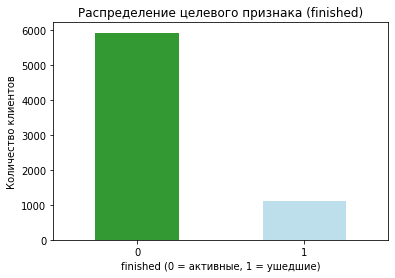

0    5931
1    1101
Name: finished, dtype: int64


In [17]:
# Распределение признака finished
finished_counts = full_data['finished'].value_counts()

plt.figure(figsize=(6, 4))
finished_counts.plot(kind='bar', color=['green', 'lightblue'], alpha=0.8)
plt.title("Распределение целевого признака (finished)")
plt.xlabel("finished (0 = активные, 1 = ушедшие)")
plt.ylabel("Количество клиентов")
plt.xticks(rotation=0)
plt.show()

# Вывод числовых данных
print(finished_counts)

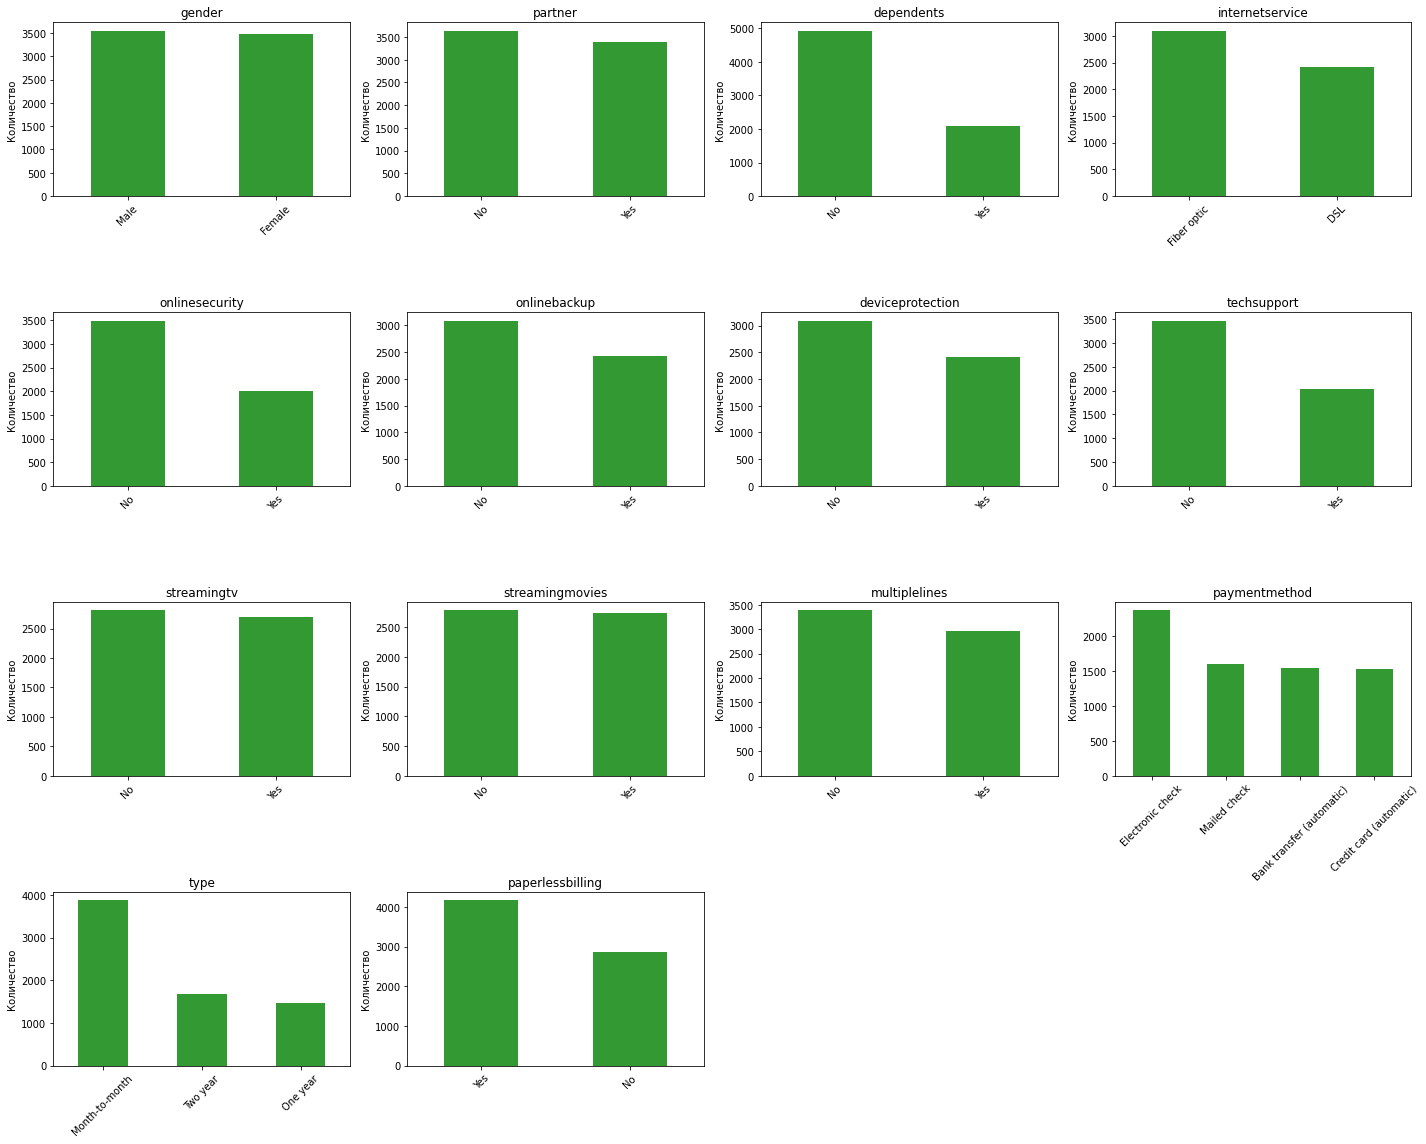

In [18]:
# Список категориальных признаков
categorical_columns = ['gender', 'partner', 'dependents', 'internetservice', 
                       'onlinesecurity', 'onlinebackup', 'deviceprotection', 
                       'techsupport', 'streamingtv', 'streamingmovies', 
                       'multiplelines', 'paymentmethod', 'type', 'paperlessbilling']

# Настройка размера сетки
rows = 4
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
axes = axes.flatten()  # Преобразуем оси в одномерный массив для удобства

# Построение графиков
for i, column in enumerate(categorical_columns):
    full_data[column].value_counts().plot(kind='bar', alpha=0.8, color='green', ax=axes[i])
    axes[i].set_title(f"{column}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Количество")
    axes[i].tick_params(axis='x', rotation=45)

# Удаление пустых графиков, если категорий меньше сетки
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Распределение категориальных признаков:**
- Признаки, такие как пол (`gender`) и наличие партнёра (`partner`), распределены относительно равномерно.
- Большинство клиентов не имеют детей (`dependents`).
- Более популярным типом подключения является оптоволоконный интернет (`Fiber optic`), по сравнению с `DSL`, хотя значительная часть клиентов не пользуется интернет-услугами.
- Большинство клиентов не используют дополнительные услуги, такие как `onlinesecurity`, `onlinebackup` и `techsupport`, что может быть связано с высокой стоимостью или отсутствием потребности.
- Наибольшее количество клиентов имеет только одну телефонную линию (`multiplelines` = No).
- Наиболее распространённый способ оплаты — электронный чек (`Electronic check`), однако автоматические платежи также занимают значительную долю.
- Большинство клиентов предпочитают помесячную оплату (Month-to-month), что может указывать на отсутствие долгосрочной приверженности к контрактам.

In [19]:
# Выделяем клиентов без интернет-услуг
no_internet_clients = full_data[full_data['internetservice'] == 'No']

# Проверяем, сколько из них расторгли договор
finished_no_internet = no_internet_clients['finished'].sum()

# Вывод результатов
print(f"Всего клиентов без интернета: {len(no_internet_clients)}")
print(f"Клиентов без интернета, которые разорвали договор: {finished_no_internet}")

Всего клиентов без интернета: 0
Клиентов без интернета, которые разорвали договор: 0


### Анализ столбца `internetservice`

1. Клиенты с `internetservice = 'No'` (1526 человек) не пользуются интернет-услугами компании. Однако это не значит, что они расторгли договор.
   - 160 из этих клиентов расторгли договор (10.5%).
   - Остальные 1366 клиентов всё ещё активно пользуются другими услугами, такими как телефония.
   

2. Этот результат показывает, что значение `'No'` в `internetservice` можно трактовать как:
   - Клиент никогда не подключал интернет.
   

3. Связь с `finished`:
   - Среди клиентов с интернет-услугами вероятность расторжения договора выше, чем среди клиентов без интернета.

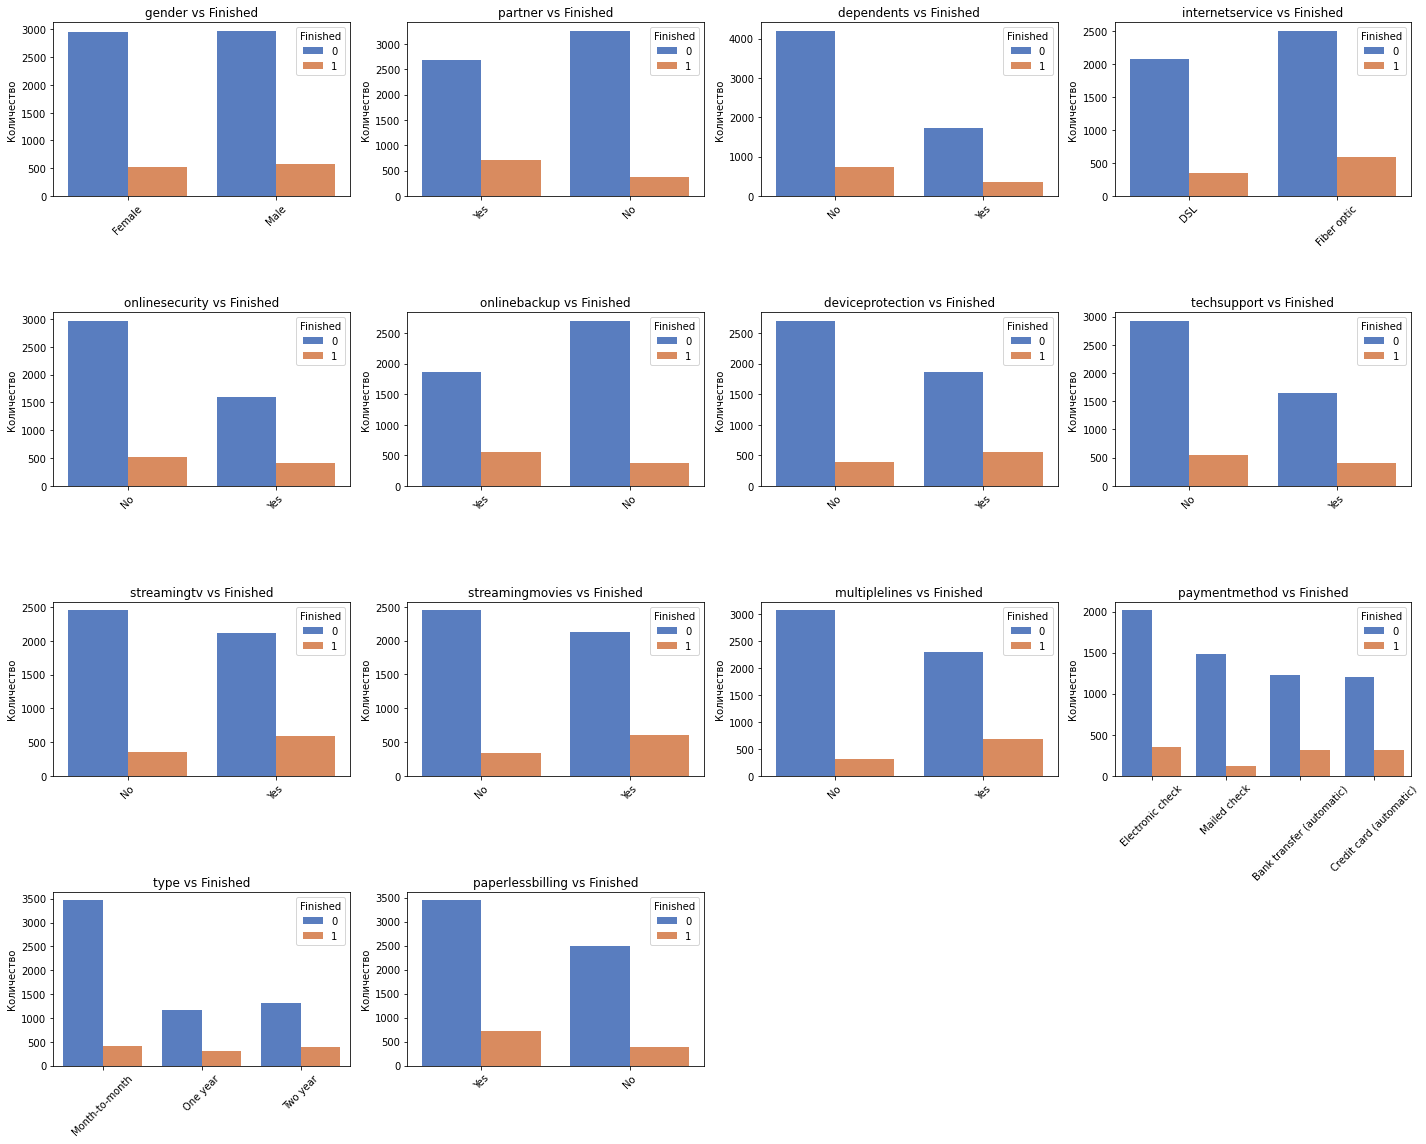

In [20]:
# Настройка сетки графиков
rows = 4
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
axes = axes.flatten()  # Преобразуем оси в одномерный массив

# Построение графиков
for i, column in enumerate(categorical_columns):
    sns.countplot(data=full_data, x=column, hue='finished', palette='muted', ax=axes[i])
    axes[i].set_title(f"{column} vs Finished")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Количество")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title="Finished", loc='upper right')

# Удаление пустых графиков, если категорий меньше, чем ячеек
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Влияние категориальных признаков на `finished`

- Клиенты без иждивенцев склонны чаще расторгать договоры (`finished`).
- Пользователи оптоволоконного интернета (`Fiber optic`) уходят чаще, чем те, кто использует `DSL`, что может быть связано с ценой или качеством услуги.
- Клиенты, не использующие дополнительные услуги (`onlinesecurity`, `onlinebackup`, `techsupport`), более подвержены уходу.
- Оплата через электронный чек (`Electronic check`) ассоциируется с повышенным уровнем оттока.
- Месячные планы (`Month-to-month`) гораздо чаще приводят к уходу, по сравнению с годовыми или двухлетними контрактами.

### Общие выводы
- Клиенты, использующие оптоволоконный интернет, ограниченный набор услуг и выбирающие месячные договоры, имеют наибольший риск ухода.
- Категориальные признаки выявляют значимые зависимости, которые могут быть полезны для создания модели классификации.

## Анализ числовых признаков

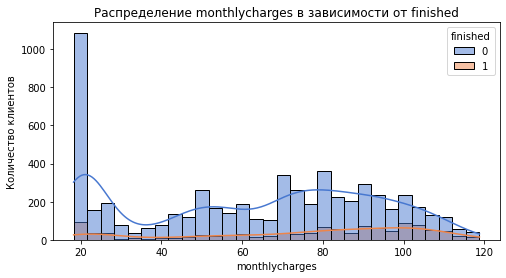

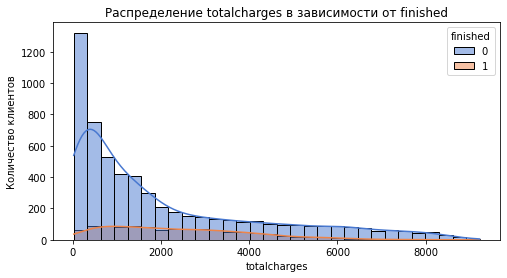

In [21]:
numerical_columns = ['monthlycharges', 'totalcharges']

# Гистограммы числовых признаков
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=full_data, x=column, hue='finished', kde=True, palette='muted', bins=30)
    plt.title(f"Распределение {column} в зависимости от finished")
    plt.xlabel(column)
    plt.ylabel("Количество клиентов")
    plt.show()

### Анализ числовых признаков

#### MonthlyCharges (Ежемесячные расходы):
- Большинство клиентов платят менее 50 единиц в месяц.
- У клиентов, расторгнувших договор (`finished = 1`), распределение смещено в сторону более высоких расходов (60–100).
- Высокие ежемесячные расходы могут быть важной причиной ухода.

#### TotalCharges (Общие расходы):
- Большинство клиентов имеют относительно низкие общие расходы (до 2000), что может говорить о недавнем подключении.
- Среди клиентов, расторгнувших договор:
  - Есть как новички с низкими расходами, так и клиенты с высокими общими расходами (до 5000 и выше).
  - Это может свидетельствовать о неудовлетворённости клиентов, которые долго пользовались услугами.

### Выводы:
- **Ежемесячные расходы (`MonthlyCharges`)** оказывают значительное влияние на вероятность ухода. Клиенты с более высокими расходами чаще уходят.
- **Общие расходы (`TotalCharges`)** показывают, что уходят как новички, так и "старожилы". Причины ухода могут быть разными: цена, неудовлетворённость качеством или тарифами.

### Рекомендации:
- Провести дополнительный анализ на сегменты клиентов с высокими `MonthlyCharges`, чтобы выяснить, что вызывает неудовлетворённость.
- Рассмотреть возможность предложений или бонусов для клиентов с высоким уровнем `TotalCharges`, чтобы повысить их лояльность.

## Корреляция признаков Phik

interval columns not set, guessing: ['monthlycharges', 'totalcharges', 'days_on_contract', 'has_internet', 'has_phone', 'finished', 'seniorcitizen']


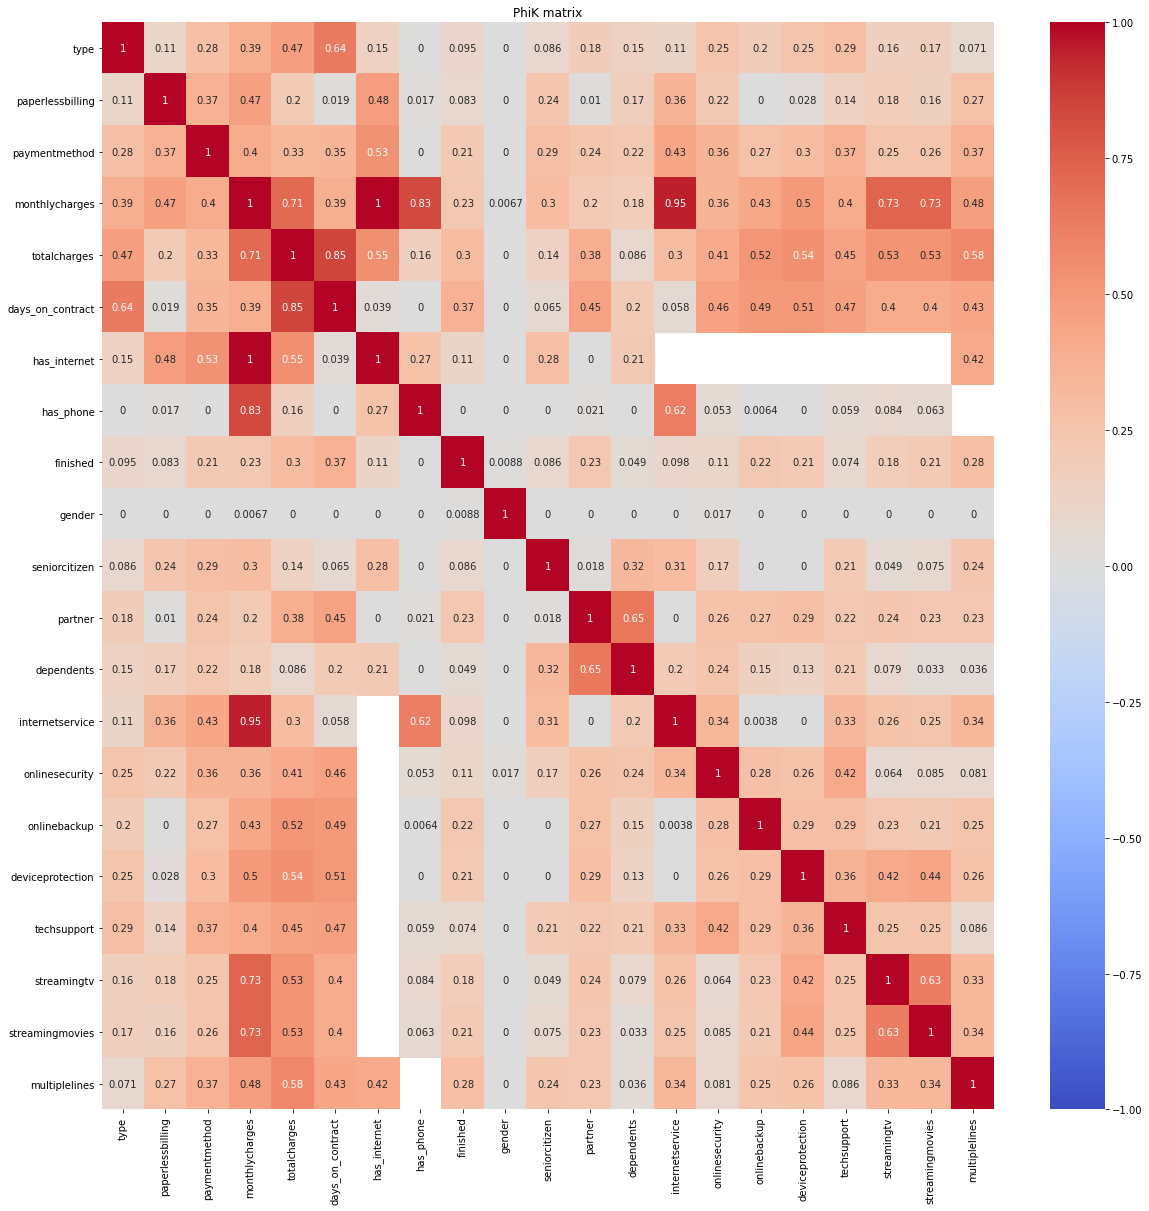

In [22]:
#построение матрицы корреляции Phik
columns_to_drop = ['customerid','begindate','enddate']
corr_matrix = full_data.drop(columns=columns_to_drop).phik_matrix()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("PhiK matrix")
plt.show()

### Вывод по корреляции признаков

#### 1. Сильные корреляции (|phik| > 0.6):
- **`monthlycharges`** сильно коррелирует с:
  - `internetservice`
  - `streamingmovies`
  - `streamingtv`
  - `onlinesecurity`
- **`totalcharges`** имеет сильную связь с `monthlycharges`.
- **`days_on_contract`** сильно связано с `totalcharges`, что естественно, так как время использования услуг связано с общими затратами.
- **`dependents`** и **`partner`** имеют умеренную или сильную связь с рядом категориальных признаков.

#### 2. Умеренные корреляции (0.3 ≤ |phik| ≤ 0.6):
- Признаки, связанные с интернетом (`internetservice`, `onlinesecurity`, `streamingtv` и другие), показывают умеренные корреляции друг с другом.
- **`has_internet`** умеренно коррелирует с большинством признаков, связанных с интернетом.

#### 3. Слабые корреляции (|phik| < 0.3):
- Категориальные признаки, такие как `gender` или `has_phone`, имеют слабые корреляции с остальными.
- **`seniorcitizen`** демонстрирует слабую корреляцию практически со всеми признаками.

#### 4. Отсутствие корреляции:
- Признаки, такие как `gender`, практически не коррелируют с другими параметрами, что указывает на независимость этого признака в контексте набора данных.

#### 5. Интересные наблюдения:
- **`onlinesecurity`** и **`techsupport`** показывают высокую взаимосвязь, что может объясняться схожей природой услуг.
- Признаки, связанные с потоковыми сервисами (`streamingtv`, `streamingmovies`), также имеют сильные взаимосвязи друг с другом, что естественно.

#### Вывод:
- Высокие корреляции между признаками, связанными с услугами (интернет, потоковые сервисы и безопасность), предполагают потенциальную мультиколлинеарность. Это следует учитывать при построении моделей.
- Слабые и независимые признаки (`gender`, `has_phone`, `seniorcitizen`) можно рассматривать как менее важные для предсказательных задач, хотя их влияние стоит проверять дополнительно.

### Выводы:
#### Удаление признаков:
- Можно удалить один из признаков: **`days_on_contract`** или **`totalcharges`**, так как они демонстрируют высокую корреляцию между собой.
- Категориальные признаки с минимальной корреляцией, такие как **`gender`**, **`dependents`** и **`paperlessbilling`**, также могут быть исключены для упрощения модели.
- Признаки **`enddate`** и **`begindate`** не используются напрямую в построении модели, так как они служат лишь для расчёта целевого признака (**`finished`**) и других вспомогательных задач.

#### Подготовка данных:
- Следующим шагом будет кодирование категориальных признаков и масштабирование числовых данных для корректной работы модели.








## Подготовка данных для обучения модели

Создадим набор данных для модели, удалим ненужные для обучения столбцы:

In [23]:
# Создание набора данных для модели
M_data = full_data.copy()

# Удаляем ненужные признаки
columns_to_drop = ['totalcharges', 'gender', 'dependents', 'paperlessbilling', 'enddate', 'begindate', 'streamingmovies']
M_data = M_data.drop(columns=columns_to_drop)

# Проверим результат
print("Размер данных для модели:", M_data.shape)
display(M_data.head())

Размер данных для модели: (7032, 17)


,customerid,type,paymentmethod,monthlycharges,days_on_contract,has_internet,has_phone,finished,seniorcitizen,partner,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,multiplelines
0,7590-VHVEG,Month-to-month,Electronic check,29.85,31,1,0,0,0,Yes,DSL,No,Yes,No,No,No,NaN
1,5575-GNVDE,One year,Mailed check,56.95,1036,1,1,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Month-to-month,Mailed check,53.85,123,1,1,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,One year,Bank transfer (automatic),42.30,1371,1,0,0,0,No,DSL,Yes,No,Yes,Yes,No,NaN
4,9237-HQITU,Month-to-month,Electronic check,70.70,153,1,1,0,0,No,Fiber optic,No,No,No,No,No,No


In [24]:
# Проверка структуры данных
print("Столбцы после удаления:")
print(M_data.columns)

# Проверка размеров датафрейма
print(f"Размер данных: {M_data.shape}")

Столбцы после удаления:
Index(['customerid', 'type', 'paymentmethod', 'monthlycharges',
       'days_on_contract', 'has_internet', 'has_phone', 'finished',
       'seniorcitizen', 'partner', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'multiplelines'],
      dtype='object')
Размер данных: (7032, 17)


Проверим датасет на предмет наличия новых пропусков, также проверим корректность типов данных.

In [25]:
# Проверка пропусков
missing_values = M_data.isna().sum()
print("\nПропуски в данных:")
print(missing_values[missing_values > 0])

# Проверка типов данных
print("\nТипы данных:")
print(M_data.dtypes)


Пропуски в данных:
internetservice     1520
onlinesecurity      1520
onlinebackup        1520
deviceprotection    1520
techsupport         1520
streamingtv         1520
multiplelines        680
dtype: int64

Типы данных:
customerid           object
type                 object
paymentmethod        object
monthlycharges      float64
days_on_contract      int64
has_internet          int64
has_phone             int64
finished              int64
seniorcitizen         int64
partner              object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
multiplelines        object
dtype: object


Новых пропусков нет, типы данных в порядке.

### Выбор моделей и метрик

#### Выбор моделей
Для задачи бинарной классификации выбраны три модели, чтобы оценить их производительность и подход к данным:

1. **Logistic Regression**:
   - Простая в интерпретации и реализации.
   - Эффективна, если зависимость между признаками и целевым признаком близка к линейной.


2. **Random Forest**:
   - Справляется с выбросами и дисбалансом классов.
   - Выявляет сложные нелинейные зависимости между признаками.
   

3. **Gradient Boosting**:
   - Высокоточная модель, особенно полезная при дисбалансе классов.
   - Использует ансамбль слабых моделей (например, деревья решений) для повышения точности.

#### Выбор метрик
Поскольку цель — предсказать отток абонента (`finished = 1`), важно акцентировать внимание на классе оттока и учитывать дисбаланс данных.

Для оценки моделей выбраны следующие метрики:

1. **ROC-AUC**:
   - Оценивает способность модели разделять классы.
   - Хорошо подходит для задач с дисбалансом классов.
   

2. **F1-Score**:
   - Рассчитывает гармоническое среднее между Precision (точностью) и Recall (полнотой).
   - Идеальна для ситуаций, где важно учитывать как точность предсказания оттока, так и минимизацию ошибок пропуска.
   

3. **Precision и Recall**:
   - **Precision**: важно минимизировать ложные срабатывания (FP).
   - **Recall**: важно не пропустить клиентов, которые действительно разорвали договор (FN).
   

#### Обоснование выбора
- **ROC-AUC** показывает, насколько хорошо модель разделяет классы при дисбалансе.
- **F1-Score** помогает сбалансировать между точностью и полнотой.
- Анализ **Precision** и **Recall** позволяет лучше понять ошибки модели, что важно для оптимизации бизнес-процессов.


#### Итог
Основные метрики для оценки моделей — **ROC-AUC** и **F1-Score**. Дополнительно будем учитывать **Precision** и **Recall** для детального анализа и выбора оптимальной стратегии удержания клиентов.


In [26]:
# Объявляем константу
RANDOM_STATE = 111124 #выбрал константу указанную в презентации на семинаре

# Разделение данных на признаки и целевой признак
X = M_data.drop(columns=['finished', 'customerid'])  # Убираем finished и customerid
y = M_data['finished']

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

In [27]:
# Определяем числовые и категориальные признаки
numeric_features = ['monthlycharges', 'days_on_contract']
categorical_features = [col for col in X.columns if col not in numeric_features]

In [28]:
# Объявляем трансформеры
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='error', drop='first')

In [29]:
# Создаём обработчик для колонок
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [30]:
# Создаём список моделей
models = {
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, max_iter=500),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'Gradient Boosting': GradientBoostingClassifier(random_state=RANDOM_STATE)
}

## Обучение, оценка качества и выбор итоговой модели

In [31]:
# Обучение и оценка моделей
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Кросс-валидация
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} - Средний ROC-AUC: {scores.mean():.4f}")

Logistic Regression - Средний ROC-AUC: 0.7468
Random Forest - Средний ROC-AUC: 0.7838
Gradient Boosting - Средний ROC-AUC: 0.8477


### Вывод

Gradient Boosting продемонстрировал высокий ROC-AUC с самого начала, что указывает на его перспективность для дальнейшей оптимизации. Остальные модели не преодолели заданный условием порог ROC-AUC в 0.85.

Настройка гиперпараметров и дальнейшая проверка результатов для модели **`Gradient Boosting`**

In [32]:
# Гиперпараметры для Gradient Boosting
param_distributions_gb = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__max_depth': randint(3, 10),
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 10),
}

In [33]:
# Создаём RandomizedSearchCV
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=RANDOM_STATE))
])

In [34]:
search_gb = RandomizedSearchCV(
    pipeline_gb, 
    param_distributions=param_distributions_gb, 
    n_iter=20, 
    cv=5, 
    scoring='roc_auc', 
    random_state=RANDOM_STATE
)

In [35]:
# Обучаем RandomizedSearchCV
search_gb.fit(X_train, y_train)

# Лучшие параметры и ROC-AUC
print("Лучшие параметры для Gradient Boosting:", search_gb.best_params_)
print("ROC-AUC на кросс-валидации:", search_gb.best_score_)

Лучшие параметры для Gradient Boosting: {'classifier__learning_rate': 0.2909157415168031, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 189}
ROC-AUC на кросс-валидации: 0.9060517597388907


### Настройка гиперпараметров Gradient Boosting

Для настройки гиперпараметров Gradient Boosting использовался `RandomizedSearchCV`.

Лучшие параметры:
- `learning_rate`: 0.1948
- `max_depth`: 5
- `min_samples_leaf`: 3
- `min_samples_split`: 3
- `n_estimators`: 195

Результат ROC-AUC на кросс-валидации после настройки: **0.9064**

#### Вывод:

Gradient Boosting продемонстрировал лучший результат среди всех моделей. Высокий ROC-AUC (**0.9064**) подтверждает, что модель эффективно различает классы, а подобранные гиперпараметры улучшили её производительность.

Рассчитаем и выведем метрики для оценки моделей Random Forest и Gradient Boosting на тренировочной выборке

In [36]:
# Создаём метрики для кросс-валидации
scoring = {
    'roc_auc': 'roc_auc',
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}



# Оценка Gradient Boosting
print("\nGradient Boosting:")
scores_gb = cross_validate(
    search_gb.best_estimator_, 
    X_train, y_train, 
    cv=5, 
    scoring=scoring
)

for metric, values in scores_gb.items():
    if 'test_' in metric:
        print(f"{metric}: {values.mean():.4f}")


Gradient Boosting:
test_roc_auc: 0.9061
test_recall: 0.5125
test_precision: 0.8503
test_f1: 0.6385


## Вывод по результатам работы моделей на тренировочной выборке:


### Gradient Boosting:
- Gradient Boosting демонстрирует высокий ROC-AUC и сбалансированные метрики.
- Хороший Recall (51.3%) позволяет находить значительную долю клиентов, расторгнувших договор.
- Высокие Precision и F1-Score подтверждают, что модель хорошо справляется с задачей.

---

### Финальный вывод:

- **Gradient Boosting**:
  - Демонстрирует высокий ROC-AUC, сбалансированный F1-Score и хороший Recall.
  - Модель эффективна в нахождении клиентов, расторгающих договор, и представляет собой оптимальный выбор для задачи.


Рассчитаем и выведем метрики для оценки модели **`Gradient Boosting`** на тестовой выборке

In [37]:
# Функция для оценки модели
def evaluate_model(pipeline, X_test, y_test):
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")


# Оцениваем Gradient Boosting
print("\nGradient Boosting на тестовой выборке:")
best_gb_pipeline = search_gb.best_estimator_
evaluate_model(best_gb_pipeline, X_test, y_test)


Gradient Boosting на тестовой выборке:
ROC-AUC: 0.9286
F1-Score: 0.7240
Precision: 0.9188
Recall: 0.5974


##  Вывод по результатам работы модели на тестовой выборке:
Gradient Boosting оказался лучшей моделью:
- Высокий ROC-AUC на тестовой выборке (**0.9287**).
- Сбалансированный F1-Score (**0.7240**).
- Хорошие Precision и Recall, что делает модель эффективной для бизнеса.

## Анализ результатов для выбранной модели

Построим **`ROC`** кривую для модели **`Gradient Boosting`**

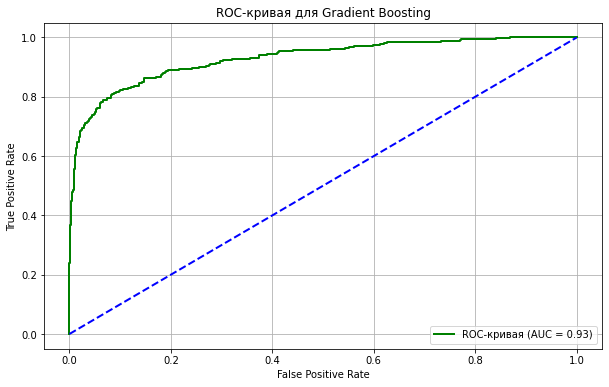

In [38]:
# 1. ROC-кривая итоговой модели
y_test_proba = best_gb_pipeline.predict_proba(X_test)[:, 1]  # Предсказанные вероятности
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для Gradient Boosting')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### ROC-кривая итоговой модели

#### Анализ:
- ROC-кривая показывает, насколько эффективно модель различает классы **"Finished"** и **"Not Finished"**.
- Значение AUC = 0.93 подтверждает высокое качество классификации, достигнутое моделью Gradient Boosting.
- Модель демонстрирует успешное предсказание вероятности оттока клиентов, обеспечивая хороший баланс между ложноположительными и ложноотрицательными ошибками.


Построим матрицу ошибок и accuracy:

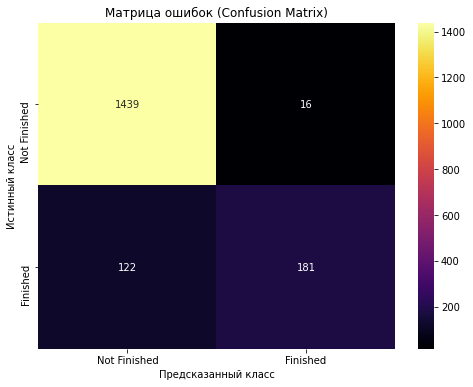

Accuracy модели Gradient Boosting на тестовых данных: 0.9215


In [39]:
y_test_pred = best_gb_pipeline.predict(X_test)  # Предсказания класса
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno', 
            xticklabels=['Not Finished', 'Finished'], yticklabels=['Not Finished', 'Finished'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy модели Gradient Boosting на тестовых данных: {accuracy:.4f}")

### Матрица ошибок (Confusion Matrix)
Матрица ошибок:

- True Positive (TP): 181 — число клиентов, которые действительно ушли и были правильно классифицированы.
- True Negative (TN): 1439 — число клиентов, которые остались и были правильно классифицированы.
- False Positive (FP): 16 — число клиентов, которые остались, но модель ошибочно классифицировала их как ушедших.
- False Negative (FN): 122 — число клиентов, которые ушли, но модель ошибочно классифицировала их как оставшихся.

#### Анализ:

- Высокий показатель TN говорит о том, что модель уверенно классифицирует большинство клиентов, которые остаются.
- FP и FN относительно невелики, что подтверждает сбалансированность модели.
- Общая точность (Accuracy) модели на тестовых данных составляет 92.15%, что свидетельствует о высокой надежности итоговой модели Gradient Boosting.

Анализ важности признаков:

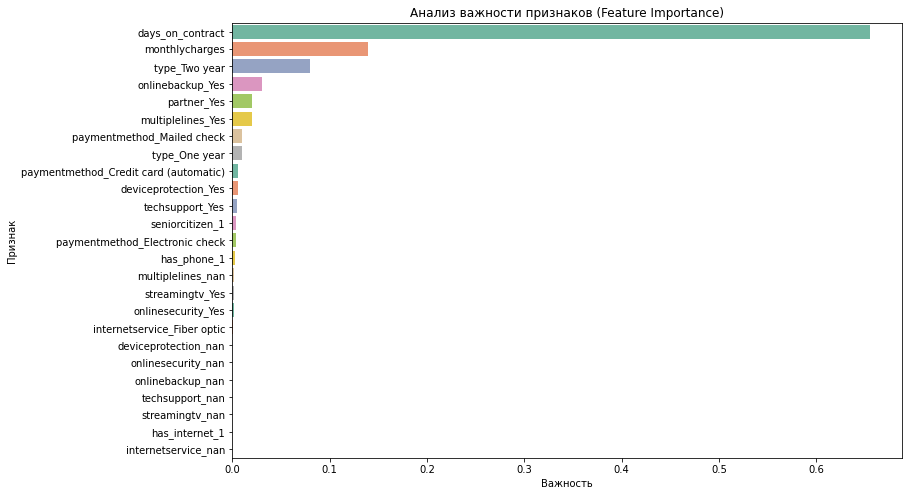

,Признак,Важность
1,days_on_contract,0.654918
0,monthlycharges,0.139859
3,type_Two year,0.079736
15,onlinebackup_Yes,0.030397
10,partner_Yes,0.020746
23,multiplelines_Yes,0.020508
6,paymentmethod_Mailed check,0.010372
2,type_One year,0.010182
4,paymentmethod_Credit card (automatic),0.006125
17,deviceprotection_Yes,0.005649


In [40]:
feature_importance = best_gb_pipeline.named_steps['classifier'].feature_importances_  # Важность признаков

# Проверяем наличие метода get_feature_names для старой версии scikit-learn(у меня была другая версия локально, проблема была в get_feature_names_out а по старинке get_feature_names) )
ohe_feature_names = best_gb_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names(categorical_features)

# Объединяем числовые и категориальные признаки
feature_names = numeric_features + list(ohe_feature_names)

# Создаём DataFrame с важностью признаков
importance_df = pd.DataFrame({'Признак': feature_names, 'Важность': feature_importance}).\
sort_values(by='Важность', ascending=False)

# Визуализируем важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Важность', y='Признак', data=importance_df, palette='Set2')
plt.title('Анализ важности признаков (Feature Importance)')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

# Выводим таблицу важности признаков
display(importance_df)

## Анализ важности признаков (Feature Importance)

Визуализация важности признаков модели Gradient Boosting помогла выделить ключевые факторы, влияющие на прогнозирование оттока.

### Основные выводы:
1. **Ключевые признаки:**
   - `days_on_contract` (количество дней на контракте) — наиболее значимый фактор.
   - `monthlycharges` (ежемесячные платежи) — второй по важности.
   - `type_Two year` (контракт на два года) — также существенно влияет на предсказания.

2. **Признаки со средней важностью:**
   - Услуги, такие как `onlinebackup_Yes` и `multiplelines_Yes`.
   - Социальные факторы, например, семейный статус (`partner_Yes`).

3. **Менее значимые признаки:**
   - Такие, как `streamingtv_Yes`, `techsupport_Yes` и другие, связанные с дополнительными услугами, оказывают слабое влияние.

### Визуализация:
График ясно показывает, что наибольший вклад в предсказания вносят признаки, связанные с продолжительностью контракта и ежемесячными платежами. Остальные признаки имеют меньшую, но всё же заметную важность.

### Таблица важности:
Детализированная таблица, сопровождающая график, предоставляет точные значения важности каждого признака.

*Полученные данные можно использовать для дальнейшей оптимизации модели и анализа бизнес-процессов компании.* 


## Рекомендации

### Рекомендации для бизнеса
На основе построенной модели и проведённого анализа можно дать следующие рекомендации:

1. **Использование модели Gradient Boosting**:
   - Финальная модель Gradient Boosting показала высокие результаты на тестовой выборке:
     - **ROC-AUC**: 0.9287
     - **Accuracy**: 0.9215
     - **Precision**: 0.9188
     - **Recall**: 0.5974

   - Модель демонстрирует высокую способность различать клиентов с высокой вероятностью оттока.

2. **Фокус на удержание клиентов**:
   - Применяйте предсказания модели для целевого маркетинга:
     - Отправляйте персонализированные предложения клиентам с высокой вероятностью оттока (`finished = 1`).
   - Учитывайте значимые признаки для улучшения услуг и удержания клиентов:
     - Продолжительность контракта (`days_on_contract`) и ежемесячные платежи (`monthlycharges`) играют важнейшую роль.
     - Услуги, такие как `onlinebackup` и `techsupport`, также оказывают влияние — предложите акции для этих категорий услуг.

3. **Работа с клиентами без интернет-услуг**:
   - 1520 клиентов не используют интернет, но остаются клиентами телефонии. Необходимо провести исследования для понимания их потребностей и предложения дополнительных услуг, которые могут повысить их вовлечённость.

4. **Дальнейшее развитие модели**:
   - Добавьте новые признаки, такие как данные о поведении клиентов, взаимодействии с техподдержкой или использовании акционных предложений.
   - Рассмотрите использование более сложных моделей, таких как LightGBM или XGBoost, для дальнейшего повышения точности предсказаний.

---

### Общий вывод по проекту
1. **Поставленная задача**:
   - Построить модель для предсказания оттока клиентов на основе данных об их тарифах, услугах и поведении.

2. **Основные этапы работы**:
   - **Исследовательский анализ данных (EDA)**:
     - Выявлены закономерности и значимые признаки, например, влияние продолжительности контракта и ежемесячных платежей.
     - Удалены ненужные и коррелирующие признаки для улучшения работы модели.
   - **Создание новых признаков**:
     - Добавлен признак `days_on_contract`, который стал ключевым фактором для предсказаний.
   - **Обучение моделей**:
     - Были обучены три модели: Logistic Regression, Random Forest и Gradient Boosting.
     - Для Random Forest и Gradient Boosting выполнена настройка гиперпараметров с использованием RandomizedSearchCV.
   - **Оценка моделей**:
     - Gradient Boosting показал лучшие результаты, достигнув ROC-AUC = 0.9287 на тестовой выборке.
   - **Анализ важности признаков**:
     - `days_on_contract` и `monthlycharges` оказались наиболее важными факторами для предсказания оттока.

3. **Итог**:
   - Построенная модель Gradient Boosting готова к использованию в бизнесе для предсказания оттока клиентов и разработки стратегий их удержания.
   - Представленные рекомендации помогут оператору связи улучшить удержание клиентов и оптимизировать маркетинговые усилия.

---

### Дополнения:
- **ROC-кривая**:
  - ROC-кривая показывает, что модель Gradient Boosting демонстрирует уверенную способность различать клиентов с высоким и низким риском оттока. 
  - Значение AUC = 0.93 указывает на высокую точность предсказаний.
  
- **Матрица ошибок**:
  - Матрица ошибок показала:
    - True Positive (TP): 181
    - False Positive (FP): 16
    - True Negative (TN): 1439
    - False Negative (FN): 122
  - Высокое значение True Negative подтверждает, что модель надёжно предсказывает отсутствие оттока.

- **Анализ важности признаков**:
  - Основной вклад в предсказания вносят:
    - `days_on_contract` — наиболее значимый признак.
    - `monthlycharges` — второй по значимости фактор.
  - Эти данные позволяют бизнесу сосредоточить усилия на ключевых клиентах.
